### 以极坐标，通过拉格朗日法求解二维面上的行星运动方程（微分方程组）

在极坐标下，行星的运动可以通过以下二阶微分方程组来描述：

1. 径向运动方程：

$$
\ddot{r} = r \dot{\theta}^2 - \frac{G M}{r^2}
$$

2. 角度运动方程：

$$
\ddot{\theta} + \frac{2 \dot{r}}{r} \dot{\theta} = 0
$$

其中：
- $r$ 表示行星与中心天体（如太阳）之间的距离。
- $\theta$ 是角度，描述行星在极坐标系中的方位。
- $\dot{r}$ 和 $\ddot{r}$ 分别表示半径的速度和加速度。
- $\dot{\theta}$ 和 $\ddot{\theta}$ 分别表示角速度和角加速度。
- $G$ 是引力常数。
- $M$ 是中心天体的质量。

### 转换为一阶微分方程组

为了使用数值方法求解，可以将二阶微分方程组转换为一阶方程组。

设：
- $y_1 = r$
- $y_2 = \dot{r}$
- $y_3 = \theta$
- $y_4 = \dot{\theta}$

则一阶方程组为：

$$
\begin{cases}
\frac{dy_1}{dt} = y_2 \\
\frac{dy_2}{dt} = y_1 y_4^2 - \frac{G M}{y_1^2} \\
\frac{dy_3}{dt} = y_4 \\
\frac{dy_4}{dt} = -\frac{2 y_2 y_4}{y_1}
\end{cases}
$$

这个一阶微分方程组可以使用 Python 中的数值方法（如 `solve_ivp`）进行求解。



-443717684.87423515 4455659000000000.0
147100000000.0 -152080818454.05908
149569384610.6686 -149569676182.9311


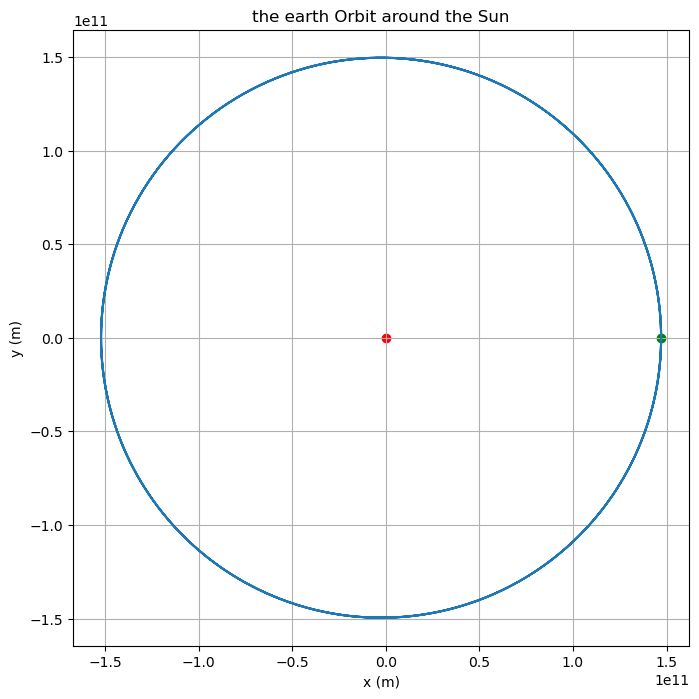

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义微分方程组
# y[0] = r, y[1] = dr/dt, y[2] = theta, y[3] = dtheta/dt
def equations(t, y, G, M):
    r, dr_dt, theta, dtheta_dt = y
    
    # 径向加速度
    d2r_dt2 = r * dtheta_dt**2 - G * M / r**2
    # 角速度变化率
    d2theta_dt2 = -2 * dr_dt * dtheta_dt / r
    
    return [dr_dt, d2r_dt2, dtheta_dt, d2theta_dt2]

# 初始条件
G = 6.67430e-11  # 引力常数, m^3 kg^-1 s^-2
M = 1.989e30     # 太阳质量, kg
r0 = 1.471e11    # 初始半径（1个天文单位），m
dr_dt0 = 0       # 初始径向速度，m/s
theta0 = 0       # 初始角度，rad
dtheta_dt0 = 3.029e4/r0  # 初始角速度
#m = 5.972e24     # 地球质量

# 初始状态向量
y0 = [r0, dr_dt0, theta0, dtheta_dt0]

#能量值和角动量
def energy(y,G,M):
    r,r_t,theta,theta_t = y
    k = (r_t**2 + (theta_t * r)**2)/2 - G * M /r
    return k 

def angle(y,G,M):
    r,r_t,theta,theta_t = y
    L =  theta_t * r**2
    return L

energy0 = energy(y0,G,M)
angle0 = angle(y0,G,M)

print(energy0,angle0)


# 时间范围（1年）
t_span = (0, 3*365 * 24 * 3600)
# 时间采样点，用于绘图（每一天）
t_eval = np.linspace(t_span[0], t_span[1], 1000*3)

# 求解微分方程
solution = solve_ivp(equations, t_span, y0, t_eval=t_eval, args=(G, M), rtol=1e-8, atol=1e-10)

# 提取结果
r = solution.y[0]
theta = solution.y[2]

# 将极坐标转换为笛卡尔坐标，便于绘图
x = r * np.cos(theta)
y = r * np.sin(theta)

print(max(x),min(x))
print(max(y),min(y))

# 绘图
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.scatter(x[0],y[0],color='green')
plt.scatter(0,0,color='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('the earth Orbit around the Sun')
plt.gca().set_aspect('equal')
plt.grid()
plt.show()


### 根据效果图示，结果和实际测量值可以对上，为一个椭圆轨道。
#### 通过这个微分方程组，生成一个两年的数据点，($365 \times 2 \times 12 = 8760 $个),保存为csv文件，供模型训练。

In [3]:
import pandas as pd

# 时间范围（2年）
t_span = (0, 365 * 2 * 24 * 3600)
# 时间采样点，用于绘图,(每天采样12个点)
t_eval = np.linspace(t_span[0], t_span[1], 365*2*12)

# 求解微分方程
solution1 = solve_ivp(equations, t_span, y0, t_eval=t_eval, args=(G, M), rtol=1e-8, atol=1e-10)

df = pd.DataFrame({
    'time':t_eval,
    'r':solution1.y[0],
    'dr/dt':solution1.y[1],
    'theta':solution1.y[2],
    'dtheta/dt':solution1.y[3]
    })

# 保存DataFrame为CSV文件
df.to_csv('earth_r_o_orbit.csv', index=False)

#查看效果：
'''# 提取结果
r1 = solution1.y[0]
theta1 = solution1.y[2]

# 将极坐标转换为笛卡尔坐标，便于绘图
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

print(max(x),min(x))
print(max(y),min(y))

plt.figure(figsize=(8, 8))
plt.plot(x1, y1)
plt.scatter(x1[0],y1[0],color='green')
plt.scatter(0,0,color='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('the earth Orbit around the Sun')
plt.gca().set_aspect('equal')
plt.grid()
plt.show()'''


"# 提取结果\nr1 = solution1.y[0]\ntheta1 = solution1.y[2]\n\n# 将极坐标转换为笛卡尔坐标，便于绘图\nx1 = r1 * np.cos(theta1)\ny1 = r1 * np.sin(theta1)\n\nprint(max(x),min(x))\nprint(max(y),min(y))\n\nplt.figure(figsize=(8, 8))\nplt.plot(x1, y1)\nplt.scatter(x1[0],y1[0],color='green')\nplt.scatter(0,0,color='red')\nplt.xlabel('x (m)')\nplt.ylabel('y (m)')\nplt.title('the earth Orbit around the Sun')\nplt.gca().set_aspect('equal')\nplt.grid()\nplt.show()"

### 在使用此数据进行训练时，发现了两个问题：
#### 1.距离、时间数据过大和弧度数据过小的问题：
1.更改时间单位为天，更改距离单位为1e10m,弧度暂时不更改
